In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from keras.datasets import cifar100

In [3]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


[86]


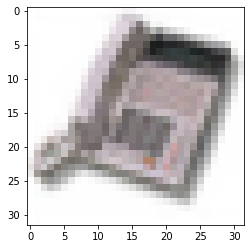

In [6]:
print(y_train[7345])
plt.imshow(x_train[7345]);

In [7]:
x_train[7345].shape

(32, 32, 3)

In [8]:
num_classes = 100

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [10]:
y_train[7345]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [12]:
model_1 = Sequential()


## 7x7 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (7, 7), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## Another 3x3 convolution with 1x1 stride and 32 filters
model_1.add(Conv2D(32, (3, 3), strides = (1,1)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        4736      
                                                                 
 activation (Activation)     (None, 16, 16, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 activation_1 (Activation)   (None, 6, 6, 32)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 32)          9248      
                                                                 
 activation_2 (Activation)   (None, 4, 4, 32)          0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 2, 2, 32)         0

In [13]:
batch_size = 64


opt = keras.optimizers.RMSprop(lr=0.0005, decay=1e-6)

model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/15
782/782 [==============================] - 18s 22ms/step - loss: 4.2777 - accuracy: 0.0472 - val_loss: 3.9762 - val_accuracy: 0.0967
Epoch 2/15
782/782 [==============================] - 18s 23ms/step - loss: 3.8717 - accuracy: 0.1083 - val_loss: 3.7006 - val_accuracy: 0.1446
Epoch 3/15
782/782 [==============================] - 17s 22ms/step - loss: 3.6618 - accuracy: 0.1374 - val_loss: 3.4370 - val_accuracy: 0.1876
Epoch 4/15
782/782 [==============================] - 17s 22ms/step - loss: 3.5149 - accuracy: 0.1631 - val_loss: 3.4677 - val_accuracy: 0.1814
Epoch 5/15
782/782 [==============================] - 19s 24ms/step - loss: 3.4134 - accuracy: 0.1826 - val_loss: 3.2613 - val_accuracy: 0.2146
Epoch 6/15
782/782 [==============================] - 18s 23ms/step - loss: 3.3371 - accuracy: 0.1959 - val_loss: 3.2753 - val_accuracy: 0.2133
Epoch 7/15
782/782 [==============================] - 18s 23ms/step - loss: 3.2806 - accuracy: 0.2061 - val_loss: 3.2826 - val_accuracy:

In [14]:
model_2 = Sequential()

model_2.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model_2.add(Activation('relu'))
model_2.add(Conv2D(32, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(64, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(Conv2D(64, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

In [15]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_5 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_6 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 15, 15, 32)        0         
                                                      

In [16]:
# initiate RMSprop optimizer
opt_2 = keras.optimizers.RMSprop(lr=0.0005)

# Let's train the model using RMSprop
model_2.compile(loss='categorical_crossentropy',
              optimizer=opt_2,
              metrics=['accuracy'])

In [17]:
model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=10,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/10
782/782 [==============================] - 89s 112ms/step - loss: 4.0689 - accuracy: 0.0801 - val_loss: 3.8412 - val_accuracy: 0.1178
Epoch 2/10
782/782 [==============================] - 85s 108ms/step - loss: 3.4627 - accuracy: 0.1751 - val_loss: 3.2275 - val_accuracy: 0.2305
Epoch 3/10
782/782 [==============================] - 87s 111ms/step - loss: 3.1595 - accuracy: 0.2329 - val_loss: 2.9335 - val_accuracy: 0.2769
Epoch 4/10
782/782 [==============================] - 90s 115ms/step - loss: 2.9418 - accuracy: 0.2733 - val_loss: 2.9375 - val_accuracy: 0.2849
Epoch 5/10
782/782 [==============================] - 85s 109ms/step - loss: 2.7816 - accuracy: 0.3069 - val_loss: 2.6194 - val_accuracy: 0.3429
Epoch 6/10
782/782 [==============================] - 86s 109ms/step - loss: 2.6349 - accuracy: 0.3352 - val_loss: 2.5702 - val_accuracy: 0.3516
Epoch 7/10
782/782 [==============================] - 86s 110ms/step - loss: 2.5219 - accuracy: 0.3585 - val_loss: 2.6720 - val_ac

In [18]:
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Conv2D,  MaxPool2D, Flatten, GlobalAveragePooling2D,  BatchNormalization, Layer, Add
from keras.models import Sequential
from keras.models import Model
import tensorflow as tf


class ResnetBlock(Model):
    """
    A standard resnet block.
    """

    def __init__(self, channels: int, down_sample=False):
        """
        channels: same as number of convolution kernels
        """
        super().__init__()

        self.__channels = channels
        self.__down_sample = down_sample
        self.__strides = [2, 1] if down_sample else [1, 1]

        KERNEL_SIZE = (3, 3)
       
        INIT_SCHEME = "he_normal"

        self.conv_1 = Conv2D(self.__channels, strides=self.__strides[0],
                             kernel_size=KERNEL_SIZE, padding="same", kernel_initializer=INIT_SCHEME)
        self.bn_1 = BatchNormalization()
        self.conv_2 = Conv2D(self.__channels, strides=self.__strides[1],
                             kernel_size=KERNEL_SIZE, padding="same", kernel_initializer=INIT_SCHEME)
        self.bn_2 = BatchNormalization()
        self.merge = Add()

        if self.__down_sample:
            
            self.res_conv = Conv2D(
                self.__channels, strides=2, kernel_size=(1, 1), kernel_initializer=INIT_SCHEME, padding="same")
            self.res_bn = BatchNormalization()

    def call(self, inputs):
        res = inputs

        x = self.conv_1(inputs)
        x = self.bn_1(x)
        x = tf.nn.relu(x)
        x = self.conv_2(x)
        x = self.bn_2(x)

        if self.__down_sample:
            res = self.res_conv(res)
            res = self.res_bn(res)

        
        x = self.merge([x, res])
        out = tf.nn.relu(x)
        return out


class ResNet18(Model):

    def __init__(self, num_classes, **kwargs):
        """
            num_classes: number of classes in specific classification task.
        """
        super().__init__(**kwargs)
        self.conv_1 = Conv2D(64, (7, 7), strides=2,
                             padding="same", kernel_initializer="he_normal")
        self.init_bn = BatchNormalization()
        self.pool_2 = MaxPool2D(pool_size=(2, 2), strides=2, padding="same")
        self.res_1_1 = ResnetBlock(64)
        self.res_1_2 = ResnetBlock(64)
        self.res_2_1 = ResnetBlock(128, down_sample=True)
        self.res_2_2 = ResnetBlock(128)
        self.res_3_1 = ResnetBlock(256, down_sample=True)
        self.res_3_2 = ResnetBlock(256)
        self.res_4_1 = ResnetBlock(512, down_sample=True)
        self.res_4_2 = ResnetBlock(512)
        self.avg_pool = GlobalAveragePooling2D()
        self.flat = Flatten()
        self.fc = Dense(num_classes, activation="softmax")

    def call(self, inputs):
        out = self.conv_1(inputs)
        out = self.init_bn(out)
        out = tf.nn.relu(out)
        out = self.pool_2(out)
        for res_block in [self.res_1_1, self.res_1_2, self.res_2_1, self.res_2_2, self.res_3_1, self.res_3_2, self.res_4_1, self.res_4_2]:
            out = res_block(out)
        out = self.avg_pool(out)
        out = self.flat(out)
        out = self.fc(out)
        return out


In [22]:
model = ResNet18(100)
model.build(input_shape = (None,32,32,3))

from keras.optimizers import SGD

model.compile(optimizer = "adam",loss='categorical_crossentropy', metrics=["accuracy"]) 
model.summary()

Model: "res_net18_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          multiple                  9472      
                                                                 
 batch_normalization_20 (Bat  multiple                 256       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 resnet_block_8 (ResnetBlock  multiple                 74368     
 )                                                               
                                                                 
 resnet_block_9 (ResnetBlock  multiple                 74368     
 )                                                     

In [23]:
opt_3 = keras.optimizers.RMSprop(lr=0.0005)

model.compile(loss='categorical_crossentropy',
              optimizer=opt_3,
              metrics=['accuracy'])

In [24]:
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/5
782/782 [==============================] - 1031s 1s/step - loss: 3.6367 - accuracy: 0.1615 - val_loss: 5.6882 - val_accuracy: 0.1065
Epoch 2/5
782/782 [==============================] - 982s 1s/step - loss: 2.8267 - accuracy: 0.2930 - val_loss: 3.8052 - val_accuracy: 0.1918
Epoch 3/5
782/782 [==============================] - 986s 1s/step - loss: 2.4114 - accuracy: 0.3784 - val_loss: 4.0806 - val_accuracy: 0.1969
Epoch 4/5
782/782 [==============================] - 1013s 1s/step - loss: 2.0752 - accuracy: 0.4475 - val_loss: 2.9813 - val_accuracy: 0.2982
Epoch 5/5
782/782 [==============================] - 1024s 1s/step - loss: 1.7681 - accuracy: 0.5178 - val_loss: 4.8228 - val_accuracy: 0.1867
